In [1]:
from armageddon import solver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
from armageddon import extension1

##   Extension 1

Here is the brief introduction and several examples for extentsion questions 1.

The function we created in the first place is `create_tabular_density`. The input is a path to the tabular data with `type` : `str`. We simply read the input csv file and split it into two `list` X and Y. Then we define a subsequential function called `tabular_density`, which is used to calculate the density of atomosphere density given different altitude. Finally we take the subsequential function `tabular_density` as the output of the function `create_tabular_density`.

Note that the interpolation strategy we choose is linear interpolation with points in tabular data file.


#### Examples for Extension 1

In [ ]:
rhoa = solver.Planet().create_tabular_density('~/acs-armageddon-Dimorphos/resources/AltitudeDensityTable.csv')

In [ ]:
rhoa(4.0600000000000000e+03 )

0.8447354565914162

#### Load data and compare our function values with the actual one

In [ ]:
def load_data(file):
    X = []
    Y = []
    data = pd.read_csv(file)
    for i in data[data.keys()[0]]:
        temp = i.split()
        X.append(eval(temp[0]))
        Y.append(eval(temp[1]))
    return X,Y

In [ ]:
X,Y = load_data('~/acs-armageddon-Dimorphos/resources/AltitudeDensityTable.csv')

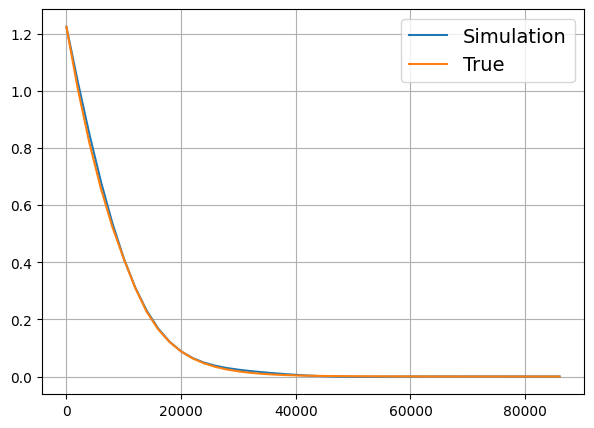

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
ax1.plot(X,rhoa(X),label = 'Simulation')
ax1.plot(X,Y, label = 'True')
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

##   Extension 2

From several observations we can approximately conclude that `radius` influence the scale of maximum air blast energy while `strength ` decides which time point its maximum will be achieved. Hence it is reansonable to only consider the point where `maximum air blast energy` occurs in the graph of `altitude` vs `total energy loss` as a simplification of the curve fitting process.

Consider our curve fitting problem as 
$$
argmin_{r,s} = || f(r,s) - T ||
$$

Where T is a function which returns the acutal point of the maximum energy loss and its corresponding altitude, f is a function returning the point of maximum energy loss and its corresponding altitude in our simulation. Then the distance in two dimensional space defined here is denoted as $$||(x_{0},y_{0}) - (x_{1},y_{1})|| = \sqrt{C\cdot(x_{0} - x_{1})^2 + (y_{0} - y_{1})^2}$$

In general we need to search both parameters such that the error (distance defined above) is set to minimum. By observing multiple plots, we find that for fixed radius $r_{0}$, such that $$error(s) =  || f(r_{0},s) - T || $$ is a convex function with respect to strength. Hence for any strength of our interests, we can always find a optimal radius as $s^{*}$, such that $ s^{*} = g(r)$. Therefore, we simplify the problem as $$argmin_{s} = || f(r,g(r)) - T ||$$

Plot `strength` vs `error` for a fixed `radius`

![ title](e1.1.png)

In fact, this error fucntion is well-defined and convex with radius such that $f$ can also be the form of $$argmin_{r} = || f(g_{1}(s),s) - T ||$$

Plot concerning `radius` and `error`

![ title](e1.2.png)

As mentioned above, since the error function with respect to radius is a convex, we choose golden section search method iteratively to improve efficiency and accuracy.

#### Examples for Extension 2

In [2]:
extension1.findstrengthradius(
        density=3300, angle=18.3, velocity=19200,
        data_file='~/acs-armageddon-Dimorphos/resources/ChelyabinskEnergyAltitude.csv',
        radians=False)

100 1
f: 5.621135987017878e+18 2.2858788250567205e+19
x: 38.8146351137604 62.1853648862396

62.1853648862396 1
f: 1.40697913785088e+18 5.621135987017878e+18
x: 24.37072977247918 38.8146351137604

38.8146351137604 1
f: 3.618125073892741e+17 1.40697913785088e+18
x: 15.443905341281225 24.37072977247918

24.37072977247918 1
f: 9.707511708176416e+16 3.618125073892741e+17
x: 9.926824431197948 15.443905341281225

15.443905341281225 1
f: 2.7751631910518704e+16 9.707511708176416e+16
x: 6.517080910083277 9.926824431197948

9.926824431197948 1
f: 8693141887739347.0 2.7751631910518704e+16
x: 4.4097435211146685 6.517080910083277

6.517080910083277 1
f: 9046652476876144.0 8693141887739347.0
x: 3.107337388968609 4.4097435211146685

6.517080910083277 3.107337388968609
f: 8693141887739347.0 5.738302601150595e+16
x: 4.4097435211146685 5.214674777937219

5.214674777937219 3.107337388968609
f: 2.506735112267256e+16 8693141887739347.0
x: 3.91226864579116 4.4097435211146685

5.214674777937219 3.912268645791

Traceback (most recent call last):
  File "/home/yzr/miniconda3/envs/ese-msc/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1369/4271271834.py", line 1, in <module>
    extension1.findstrengthradius(
  File "/home/yzr/acs-armageddon-Dimorphos/armageddon/extension1.py", line 87, in findstrengthradius
    beststrength, f2 = searchstrength(planet_instance, x2, velocity,
  File "/home/yzr/acs-armageddon-Dimorphos/armageddon/extension1.py", line 307, in searchstrength
    _, _, f1 = getfunctionvalue(planet_instance, radius, velocity,
  File "/home/yzr/acs-armageddon-Dimorphos/armageddon/extension1.py", line 215, in getfunctionvalue
    result = planet_instance.solve_atmospheric_entry(
  File "/home/yzr/acs-armageddon-Dimorphos/armageddon/solver.py", line 252, in solve_atmospheric_entry
  File "/home/yzr/acs-armageddon-Dimorphos/armageddon/solver.py", line 98, in f_solver1
   

#### Load data and compare our function values with the actual one

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
# ax1.plot(X,rhoa(X),label = 'Simulation')
# ax1.plot(X,Y, label = 'True')
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)